Задача 1.
Предположим, мы хотим найти вероятность того, что на игральной кости при броске выпадет значение больше 4.

Количество благоприятных исходов - 2 (выпадет 5 или 6)<br>
Количество возможных исходов - 6<br>
Вероятность: $\frac{2}{6}=\frac{1}{3}$

In [7]:
round(2/6, 2)

0.33

Задача 2. Написать функцию для вычисления факториала и рассчитать число сочетаний из 6 по 2.

In [8]:
def fact(x):
    if x == 0:
      return 1
    else:
      return x * fact(x - 1) 

In [9]:
fact(4)

24

$C_{6}^{2}=\frac{n!}{k!(n-k)!}$

In [10]:
#formula
int(fact(6)/(fact(2) * fact(6 - 2)))

15

Задача 3. Из 30 стрелков 12 попадает в цель с вероятностью 0,6, 8 стрелков — с вероятностью 0,5, а 10 — с вероятностью 0,7. Наудачу выбранный стрелок произвёл выстрел, поразив цель.
К какой из групп, вероятнее всего, принадлежал этот стрелок?

Событие $B_1$ - стрелок из *первой* группы, $P(B_{1})=\frac{12}{30}=\frac{2}{5}$<br>
Событие $B_2$ -стрелок из *второй* группы, $P(B_{2})=\frac{8}{30}=\frac{4}{15}$<br>
Событие $B_3$ -стрелок из *третьей* группы, $P(B_{3})=\frac{10}{30}=\frac{1}{3}$<br>

Событие $A$ - стрелок попал в цель<br>
$P(A|B_{1})=0,6$<br>
$P(A|B_{2})=0,5$<br>
$P(A|B_{3})=0,7$<br>

По формуле полной вероятности вычислим $P(A)$:<br>
$P(A)=P(B_{1})P(A|B_{1})+P(B_{2})P(A|B_{2})+P(B_{3})P(A|B_{3})$

In [11]:
p_A = (2/5) * 0.6 + (4/15) * 0.5 + (1/3) * 0.7
p_A

0.6066666666666666

По формуле Байеса вероятность того, что выстрел произведён стрелком из *первой* группы:<br>
$P(B_1|A)=\frac{P(B_1)\cdot P(A|B_1)}{P(A)}$

In [12]:
round(((2/5) * 0.6) / p_A, 4)

0.3956

По формуле Байеса вероятность того, что выстрел произведён стрелком из *второй* группы:<br>
$P(B_2|A)=\frac{P(B_2)\cdot P(A|B_2)}{P(A)}$

In [13]:
round(((4/15) * 0.5) / p_A, 4)

0.2198

По формуле Байеса вероятность того, что выстрел произведён стрелком из *третьей* группы:<br>
$P(B_3|A)=\frac{P(B_3)\cdot P(A|B_3)}{P(A)}$

In [14]:
round(((1/3) * 0.7) / p_A, 4)

0.3846

Стрелок, вероятнее всего, принадлежал к *первой* группе

Задача 4. Сгенерировать выборку реализаций случайной величины (кроме распределения Коши).
Любимое распределение можно выбрать на этом [сайте](https://docs.scipy.org/doc/scipy/reference/stats.html).
Проверить ЦПТ для различных n.

In [40]:
from scipy.stats import expon
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
a = [[]]
for n in range(1, 5):
    a.append([])
    for i in range(10**n):
        a[n].append(expon.rvs(size=1000).mean())

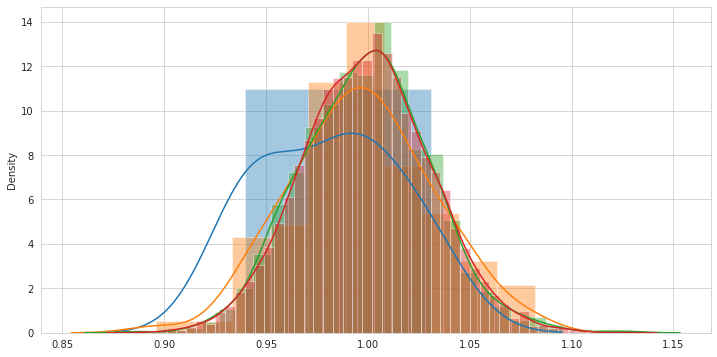

In [47]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
for j in range(1, 5):
  sns.distplot(a[j])

In [48]:
from scipy import stats
import numpy as np

In [49]:
stats.anderson(a[4])

AndersonResult(statistic=0.5660531190897018, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Задача 5. Попробовать применить ЦПТ к распределению Коши.

In [50]:
from scipy.stats import cauchy

In [52]:
a_1 = [[]]
for n in range(1, 5):
    a_1.append([])
    for i in range(10**n):
        a_1[n].append(cauchy.rvs(size=1000).mean())

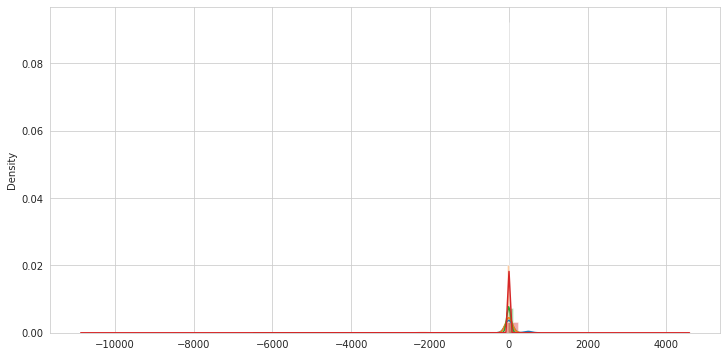

In [53]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
for j in range(1, 5):
  sns.distplot(a_1[j])

In [54]:
stats.anderson(np.array(a_1[4]))

AndersonResult(statistic=3508.792924542957, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Задача 6. Посчитать основные характеристики выборки.

In [55]:
a5 = []
a6 = []
for i in range(100000):
    a5.append(expon.rvs(size=1000).mean())
    a6.append(cauchy.rvs(size=1000).mean())

In [56]:
a5rr=np.array(a5)
a6rr=np.array(a6)

In [57]:
np.min(a5rr), np.max(a5rr), np.mean(a5rr), np.std(a5rr)

(0.8602136187202409,
 1.1394708748055475,
 0.9998789153847755,
 0.03172706226210427)

In [58]:
np.min(a6rr), np.max(a6rr), np.mean(a6rr), np.std(a6rr)

(-26897.17810314562, 78474.24519621713, 1.2412765500129177, 356.1799788084801)

Задача 7. Посчитать коэффициент корреляции для двух векторов.

In [59]:
len(a5), len(a6)

(100000, 100000)

In [60]:
np.corrcoef(a5rr, a6rr)

array([[1.        , 0.00627695],
       [0.00627695, 1.        ]])